<a href="https://colab.research.google.com/github/aikokass82-design/home-tasks-/blob/main/Lesson_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")
from datetime import datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
apt_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/appartments_data_set.csv")
apt_info

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition
0,0,7312500.0,108.00,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.00,NaN,Kyiv,NaN
1,1,1884375.0,40.40,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.00,2.0,Brovary,81.0
2,2,2922750.0,56.00,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.30,0.0,Kyiv,558.0
3,3,36506250.0,159.00,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0
4,4,5625000.0,100.00,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.00,NaN,Kyiv,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,23694,5456250.0,133.81,2024-06-23,3,3.70,5.0,73.3,3,NaN,False,13.83,NaN,Kyiv,NaN
23695,23695,1743750.0,59.00,2023-11-22,3,NaN,5.0,38.0,4,NaN,False,8.50,NaN,Borshchahivka,45.0
23696,23696,1406250.0,56.70,2024-07-22,2,NaN,3.0,29.7,1,NaN,False,NaN,NaN,Boryspil,NaN
23697,23697,6454688.0,76.75,2023-09-23,2,3.00,17.0,NaN,12,NaN,False,23.30,2.0,Kyiv,602.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

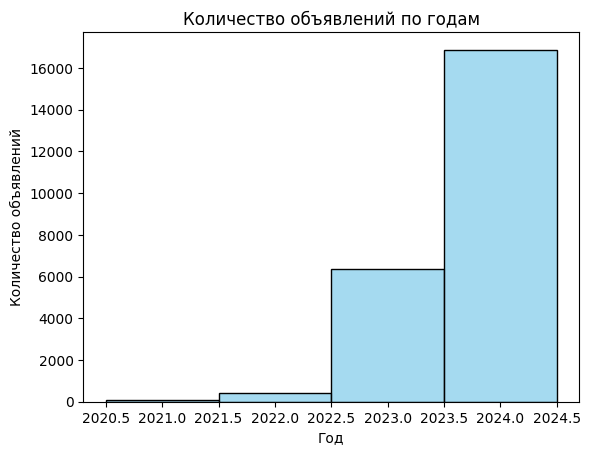

In [16]:
apt_info["first_day_exposition"] = pd.to_datetime(apt_info["first_day_exposition"], errors="coerce")
apt_info["year"] = apt_info["first_day_exposition"].dt.year

sns.histplot(data=apt_info, x="year", discrete=True, color="skyblue")
plt.xlabel("Год")
plt.ylabel("Количество объявлений")
plt.title("Количество объявлений по годам")

plt.show()

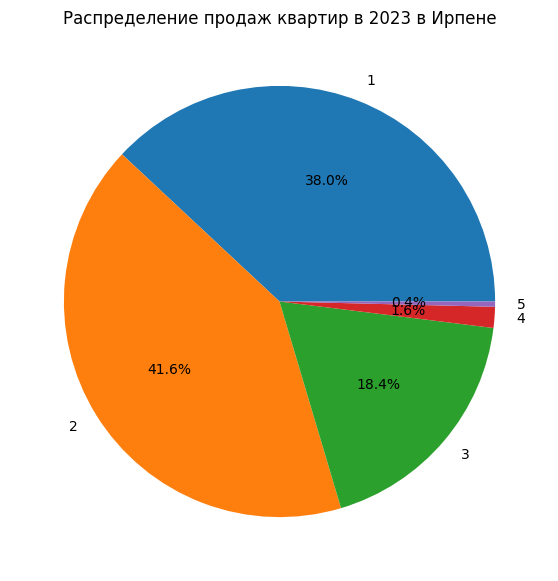

In [18]:
apt_info["first_day_exposition"] = pd.to_datetime(apt_info["first_day_exposition"], errors="coerce")
apt_info["year"]=apt_info["first_day_exposition"].dt.year
filtered = apt_info[(apt_info["locality_name"] == "Irpin")&(apt_info["first_day_exposition"].dt.year==2023)]
rooms = filtered["rooms"].value_counts().sort_index()
plt.figure(figsize=(7,7))
plt.pie(rooms, labels=rooms.index, autopct="%1.1f%%")
plt.title(f"Распределение продаж квартир в 2023 в Ирпене")
plt.show()

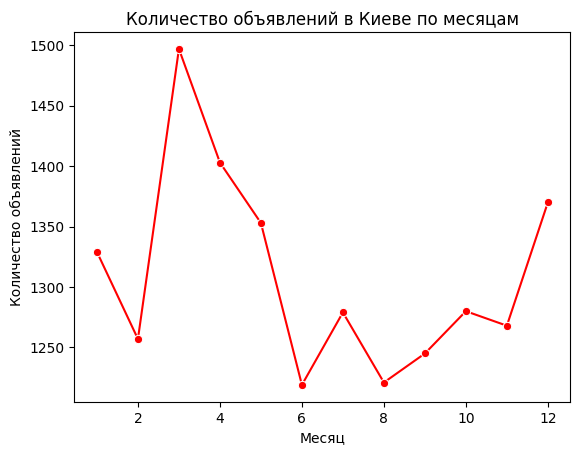

In [29]:
apt_info["first_day_exposition"] = pd.to_datetime(apt_info["first_day_exposition"], errors="coerce")
apt_info["month"]=apt_info["first_day_exposition"].dt.month
kyiv_data = apt_info[apt_info["locality_name"] == "Kyiv"]
monthly_counts = kyiv_data.groupby("month").size().reset_index(name="count")
sns.lineplot(data=monthly_counts, x="month", y = "count", marker="o", color="red")
plt.xlabel("Месяц")
plt.ylabel("Количество объявлений")
plt.title("Количество объявлений в Киеве по месяцам")

plt.show()